<a href="https://colab.research.google.com/github/Sudeshk22/image-detection/blob/main/Face_Mask_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
!pip install kaggle

In [1]:
# configure the path of kaggle.json file

# configuring the path of Kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle(2).json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle(2).json

/bin/bash: -c: line 1: syntax error near unexpected token `('
/bin/bash: -c: line 1: `cp kaggle(2).json ~/.kaggle/'
/bin/bash: -c: line 1: syntax error near unexpected token `('
/bin/bash: -c: line 1: `chmod 600 ~/.kaggle/kaggle(2).json'


In [2]:
# API to fetch the dataset from Kaggle
!kaggle datasets download -d omkargurav/face-mask-dataset



Dataset URL: https://www.kaggle.com/datasets/omkargurav/face-mask-dataset
License(s): unknown
 95% 155M/163M [00:00<00:00, 198MB/s]
100% 163M/163M [00:00<00:00, 207MB/s]


In [3]:
# Extracting the compressed data
from zipfile import ZipFile
dataset = '/content/face-mask-dataset.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [4]:
!ls

data  face-mask-dataset.zip  sample_data


In [5]:
# Importing the dependencies

import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split




In [6]:
with_mask_files = os.listdir('/content/data/with_mask')
print(with_mask_files[0:5])
print(with_mask_files[-5:])

['with_mask_2833.jpg', 'with_mask_3689.jpg', 'with_mask_964.jpg', 'with_mask_3272.jpg', 'with_mask_954.jpg']
['with_mask_3698.jpg', 'with_mask_3360.jpg', 'with_mask_2419.jpg', 'with_mask_1835.jpg', 'with_mask_3610.jpg']


In [7]:
without_mask_files = os.listdir('/content/data/without_mask')
print(without_mask_files[0:5])
print(without_mask_files[-5:])

['without_mask_3474.jpg', 'without_mask_2274.jpg', 'without_mask_1506.jpg', 'without_mask_2350.jpg', 'without_mask_2490.jpg']
['without_mask_627.jpg', 'without_mask_2313.jpg', 'without_mask_1183.jpg', 'without_mask_1492.jpg', 'without_mask_1887.jpg']


In [8]:
print('Number of with mask images:', len(with_mask_files))
print('Number of without mask images:', len(without_mask_files))

Number of with mask images: 3725
Number of without mask images: 3828


In [9]:
#creating the labels for the two class of Images#

Creating Labels for the two class of labels
With mask ---> 1
without mask --> 0

In [10]:
# create the labels

with_mask_labels = [1]*3725
without_mask_label = [0]*3828


In [11]:
print(with_mask_labels[0:5])

[1, 1, 1, 1, 1]


In [12]:
print(without_mask_label[0:5])

[0, 0, 0, 0, 0]


In [13]:
print(len(with_mask_labels))
print(len(without_mask_label))

3725
3828


In [14]:
labels = with_mask_labels + without_mask_label
print(len(labels))

7553


In [15]:
print(len(labels))

7553


In [16]:
print(with_mask_labels[0:5])
print(without_mask_label[0:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


Displaying with mask image

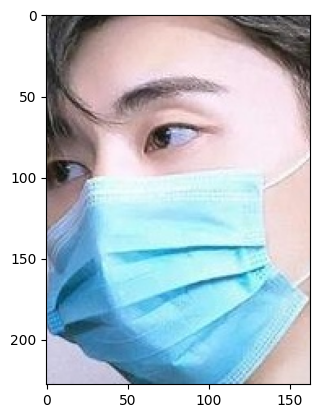

In [17]:
# displaying with mask image
img = mpimg.imread('/content/data/with_mask/with_mask_1545.jpg')
imgplot = plt.imshow(img)
plt.show()

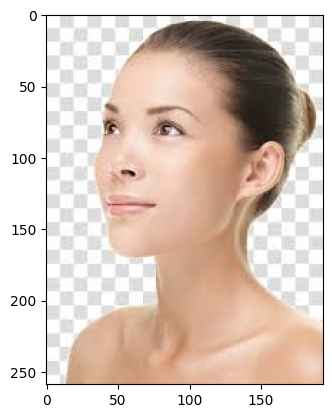

In [18]:

# displaying without mask image
img = mpimg.imread('/content/data/without_mask/without_mask_2925.jpg')
imgplot = plt.imshow(img)
plt.show()

Image Processing

1. resize the images
2. covert the images to a numpy arrays

In [19]:

# convert images to numpy arrays+

with_mask_path = '/content/data/with_mask/'

data = []

for img_file in with_mask_files:

  image = Image.open(with_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)



without_mask_path = '/content/data/without_mask/'


for img_file in without_mask_files:

  image = Image.open(without_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [20]:
type(data)

list

In [21]:
len(data)

7553

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[ 93, 112, 144],
        [ 92, 111, 142],
        [ 89, 108, 140],
        ...,
        [ 79,  98, 130],
        [ 79,  98, 130],
        [ 77,  96, 127]],

       [[ 91, 110, 142],
        [ 89, 108, 140],
        [ 87, 106, 138],
        ...,
        [ 79,  98, 130],
        [ 79,  98, 130],
        [ 77,  96, 126]],

       [[ 91, 110, 139],
        [ 90, 109, 139],
        [ 87, 106, 137],
        ...,
        [ 82,  99, 127],
        [ 82,  99, 127],
        [ 80,  98, 127]]], dtype=uint8)
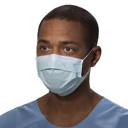

In [22]:
data[0]

In [23]:
type(data[0])

numpy.ndarray

In [24]:
data[0].shape

(128, 128, 3)

In [25]:
# converting image list and labels list to numpy arrays
X = np.array(data)
Y = np.array(labels)

In [26]:
type(X)

numpy.ndarray

In [27]:
type(Y)

numpy.ndarray

In [28]:
print(X.shape)

(7553, 128, 128, 3)


In [29]:
print(Y.shape)

(7553,)


In [30]:
print(Y)

[1 1 1 ... 0 0 0]


Train test split

In [32]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state = 2)

In [33]:
print(X.shape, X_train.shape, X_test.shape)

(7553, 128, 128, 3) (6042, 128, 128, 3) (1511, 128, 128, 3)


In [34]:
# Scaling the data

X_train_scaled = X_train/255
X_test_scaled = X_test/255

array([[[ 88,  30,  26],
        [ 96,  37,  34],
        [103,  44,  42],
        ...,
        [ 15,  16,  23],
        [ 15,  16,  21],
        [ 16,  17,  22]],

       [[ 93,  31,  26],
        [102,  41,  38],
        [108,  47,  46],
        ...,
        [ 16,  16,  24],
        [ 13,  13,  21],
        [ 15,  16,  21]],

       [[109,  43,  39],
        [119,  54,  50],
        [124,  59,  58],
        ...,
        [ 20,  20,  28],
        [ 19,  19,  27],
        [ 18,  18,  26]],

       ...,

       [[172,  60,  59],
        [174,  62,  62],
        [172,  64,  64],
        ...,
        [141, 105,  92],
        [143, 107,  93],
        [144, 108,  94]],

       [[172,  61,  59],
        [174,  64,  63],
        [171,  64,  62],
        ...,
        [140, 107,  93],
        [142, 109,  94],
        [145, 109,  93]],

       [[175,  64,  62],
        [177,  68,  65],
        [173,  65,  63],
        ...,
        [142, 109,  95],
        [144, 111,  96],
        [145, 112,  95]]], dtype=uint8)
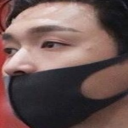

In [35]:
X_train[0]

In [36]:
X_train_scaled[0]

array([[[0.34509804, 0.11764706, 0.10196078],
        [0.37647059, 0.14509804, 0.13333333],
        [0.40392157, 0.17254902, 0.16470588],
        ...,
        [0.05882353, 0.0627451 , 0.09019608],
        [0.05882353, 0.0627451 , 0.08235294],
        [0.0627451 , 0.06666667, 0.08627451]],

       [[0.36470588, 0.12156863, 0.10196078],
        [0.4       , 0.16078431, 0.14901961],
        [0.42352941, 0.18431373, 0.18039216],
        ...,
        [0.0627451 , 0.0627451 , 0.09411765],
        [0.05098039, 0.05098039, 0.08235294],
        [0.05882353, 0.0627451 , 0.08235294]],

       [[0.42745098, 0.16862745, 0.15294118],
        [0.46666667, 0.21176471, 0.19607843],
        [0.48627451, 0.23137255, 0.22745098],
        ...,
        [0.07843137, 0.07843137, 0.10980392],
        [0.0745098 , 0.0745098 , 0.10588235],
        [0.07058824, 0.07058824, 0.10196078]],

       ...,

       [[0.6745098 , 0.23529412, 0.23137255],
        [0.68235294, 0.24313725, 0.24313725],
        [0.6745098 , 0

Building a Convolutional Neural Network (CNN)

In [37]:
import tensorflow as tf
from tensorflow import keras

In [38]:
num_of_classes = 2

model = keras.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))


model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))


model.add(keras.layers.Dense(num_of_classes, activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [39]:
# compile the neural network
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [40]:
# training the neural network
history = model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=5)

Epoch 1/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 14s 41ms/step - acc: 0.6593 - loss: 0.6879 - val_acc: 0.8810 - val_loss: 0.2773
Epoch 2/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 12s 17ms/step - acc: 0.8860 - loss: 0.2936 - val_acc: 0.8926 - val_loss: 0.2818
Epoch 3/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 5s 18ms/step - acc: 0.9074 - loss: 0.2449 - val_acc: 0.8992 - val_loss: 0.2252
Epoch 4/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - acc: 0.9249 - loss: 0.2135 - val_acc: 0.9091 - val_loss: 0.2106
Epoch 5/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - acc: 0.9328 - loss: 0.1698 - val_acc: 0.9091 - val_loss: 0.2274


**Model Evaluation**

In [41]:
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print('Test Accuracy =', accuracy)

48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - acc: 0.9189 - loss: 0.2488
Test Accuracy = 0.9146260619163513


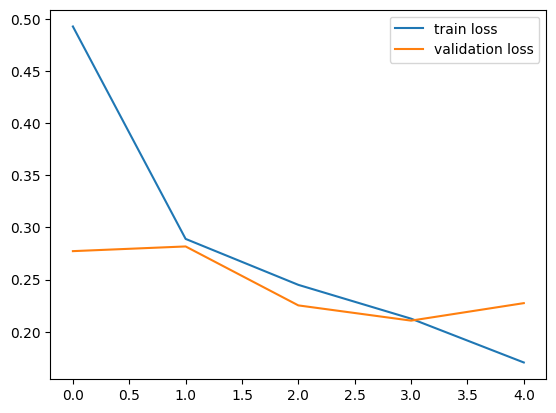

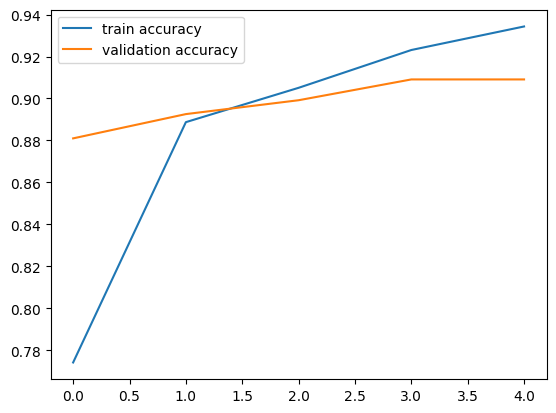

In [42]:
h = history

# plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

# plot the accuracy value
plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()

Predictive System

In [44]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1:

  print('The person in the image is wearing a mask')

else:

  print('The person in the image is not wearing a mask')

Path of the image to be predicted: /content/test.png


AttributeError: 'NoneType' object has no attribute 'clip'

In [ ]:

input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1:

  print('The person in the image is wearing a mask')

else:

  print('The person in the image is not wearing a mask')
